# Sample Data Import and Plotting

This example shows how to import and plot data from a 'comma separated variable' (CSV) spreadsheet.

## import needed functions

In [1]:
# import needed functions from numpy, matplotlib

from numpy import loadtxt, savetxt, array
# from matplotlib import pyplot, rc

default_size = 12 # change matplotlib default font size from 10 to 12
# rc('xtick', labelsize = default_size)
# rc('ytick', labelsize = default_size)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('xtick', labelsize = default_size)
mpl.rc('ytick', labelsize = default_size)

%matplotlib inline

## import data from spreadsheet

### data import command

In [2]:
filename = '650 nm calibration with error.csv'

angle, V_pd, V_pd_delta = loadtxt(filename, 
    delimiter = ',', 
    skiprows = 1, 
    unpack = True)

### explanation of data import command

Here is a short explanation of each element in the load text file command: 

#### identify the data file
```
filename = '650 nm calibration with error.csv'
```
This says the name of the data file to be loaded is  '650 nm calibration with error.csv' where .csv means it is a comma separated variable (CSV) text file. The .csv text file was created by entering data into a spreadsheet program such as Microsoft Excel or Google Sheets and then exporting that data as a CSV file. 

A .csv file is nothing all that mysterious. Go ahead and take a look at the csv file using a text editor. You will see that is a text file in which the data points in a particular row (x_i,y_i, dy_i) are separated by commas. In this particular file, the data is preceded by a 'header' row of text indicating the names corresponding to each data column. 

##### create data arrays corresponding to each data column

```
angle, V_pd, V_pd_delta = loadtxt(filename, ...)
```
This says to create three data arrays named 'angle', 'V_pd', and 'V_pd_delta', one for each of the 3 columns of data in the original spreadsheet. 


##### specify data column delimiter 
```
delimiter = ',' 
```
Because this is a csv file, the delimiter that divides data into columns is a comma. Other kinds of spreadsheet files might use spaces, tabs, or pipes (delimiter = '|') in which case you can adjust accordingly. See [https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt ] for options and further details. 

##### specify number of rows of text before data begins 
```
skiprows = 1
```
There is one (1) initial row of text preceding the data, and we need to skip it.

##### 'unpack' the data 
```
unpack = True
```
This last command has a default setting of FALSE. We need to reset it to TRUE for spreadsheet data originally entered in columns.  'unpack = True' means that the data arrives 'packed' in the form (x_1, y_1, dy_1), (x_2, y_2, dy_2), etc  instead of (x_1, x_2, x_3 ....), (y_1, y_2, y_3, ...), etc and therefore needs to be 'unpacked.' 

## plot the data (with uncertainty) 
    
We plan to plot V_pd as a function of angle, and will use 'V_pd_delta' to The first column of data ('angle') will be the 'x' data in our plot, the 2nd column 'V_pd" will be the 'y' data, and the third column is the uncertainty in the y data. 

In [3]:
#change default settings
mpl.rc('xtick', labelsize = 18) #18 point font
mpl.rc('ytick', labelsize = 18) #18 point font

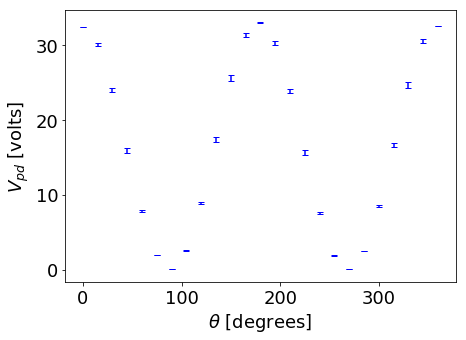

In [4]:
#specify that you want to create a new figure. This is mandatory

#plt.figure() #this is the default command
plt.figure(figsize = (7,5)) # specify size of figure, in inches

#label axes, chose font size 

plt.xlabel(r"$\theta$ [degrees]", fontsize = 18)
plt.ylabel(r"$V_{pd}$ [volts]", fontsize = 18)

#plot the data! 
plt.errorbar(
    angle, V_pd,  xerr=None, yerr=V_pd_delta, 
    linestyle = 'none', color = 'blue',  capsize = 3, capthick = 1)

#pyplot.errorbar(angle, V_pd, xerr = None, yerr = None, 
#                fmt = 'o', color = 'red', linewidth = 1, fillstyle = 'none')

plt.show()


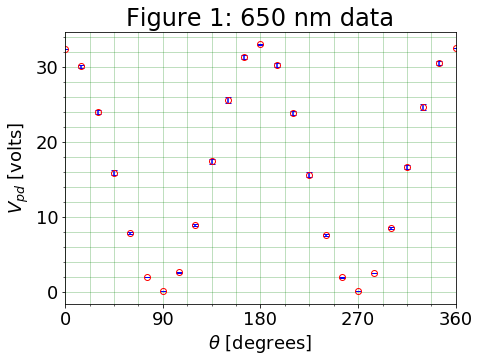

In [5]:
#here is an expanded version with additional options specified

#plt.figure() #this is the default command
plt.figure(figsize = (7,5)) # specify size of figure, in inches

#label axes, chose font size 

plt.xlabel(r"$\theta$ [degrees]", fontsize = 18)
plt.ylabel(r"$V_{pd}$ [volts]", fontsize = 18)

#plot data as error bars
plt.errorbar(
    angle, V_pd,  xerr=None, yerr=V_pd_delta, 
    linestyle = 'none', color = 'blue',  capsize = 3, capthick = 1)

#plot data as hollow circles with error bars
#plt.errorbar(
#    angle, V_pd,  xerr=None, yerr=V_pd_delta, 
#    fmt = 'o', linewidth = 1, fillstyle = 'none', 
#    linestyle = 'none', color = 'black',  capsize = 3, capthick = 1)

#replot data as hollow circles without error bars
plt.errorbar(angle, V_pd, xerr = None, yerr = None, 
                fmt = 'o', color = 'red', linewidth = 1, fillstyle = 'none')

#specify caption, if desired

figurenumber = 1
caption = 'Figure ' + str(figurenumber) + ': 650 nm data'
plt.title(caption, fontsize = 24)

#define the axis limits (or omit for autoscaling)
plt.xlim(0, 360)
plt.xticks([0, 90, 180,  270, 360])
#plt.ylim(-10, 40)

#specify grid parameters

#plt.grid(0) #turn grid off
plt.grid(1, which = 'both', color = 'green', linewidth = 1, alpha = 0.25) 

#plt.minorticks_off()
plt.minorticks_on()

#alternative to a grid: create a horizontal line at y = 0
#plt.hlines(0, 0, 360, 
#   linestyle = 'dashed', color = 'green', linewidths = 1)

plt.show()


In [6]:
# restore default matplotlib settings
mpl.rc('xtick', labelsize = default_size)
mpl.rc('ytick', labelsize = default_size)

### saving data to CSV spreadsheet file

For completeness, we now show how to export the data to a csv file. There are many other ways to do this.  We like ours. 

In [7]:
# from numpy import loadtxt, savetxt, array # already done at beginning of notebook! 

output_filename = 'output.csv'              #provide a name for the new file
header_row_text = 'angle, V_pd, V_pd_delta' #make first row of file be a list of column names. Optional. 
comment_text = ''                           #do not start header row with a '#'. Optional. 
#comment_text = '#'                         #start the header row with a '#' . Default setting. 

data = array([angle, V_pd, V_pd_delta]).T   #create a 2D matrix. Transpose rows and columns. 
savetxt(output_filename, data, 
        delimiter = ',', 
        header = header_row_text, 
        comments = comment_text) 

Note:  ordinarily, savetxt  would save the data  with each variable corresponding to a different row instead of to a different column.  That is, the default is to save the data in 'unpacked' format. This is often convenient for work within python but is not what we wanted  in this particular case. 

We therefore  did the following trick before saving the data to a file: we created a 2D matrix of our data with the command array([angle, V_pd, V_pd_delta]), then used the .T command to transpose the matrix , thereby flipping the rows and columns.  